# Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score

# Reading the Data

In [12]:
df = pd.read_excel('data 1.xlsx')
df.head()

,Cancer stage,Clump thickness,No of week,Clump thickness_new,No of week_new,True cancer stage
0,1.0,10.510076,6.166544,10.269649,11.999203,1
1,1.0,11.739776,7.024066,10.494287,6.495638,1
2,1.0,7.857070,5.909366,8.516879,7.102108,1
3,1.0,10.817929,5.920890,8.979736,9.196251,1
4,1.0,10.302407,6.984937,9.553005,7.120283,1


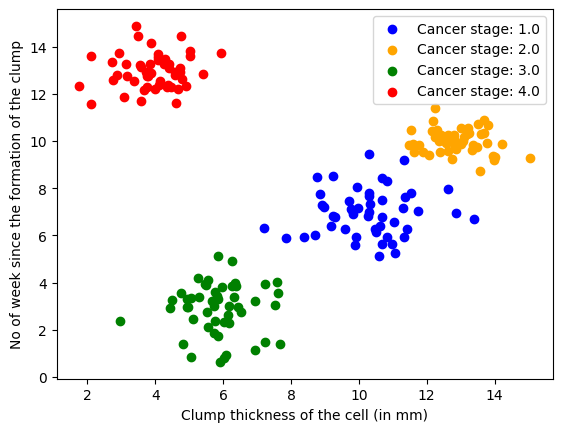

In [13]:
# plotting clump thickness vs no of week with their class labels
class1 = df[df['Cancer stage'] == 1.0]
class2 = df[df['Cancer stage'] == 2.0]
class3 = df[df['Cancer stage'] == 3.0]
class4 = df[df['Cancer stage'] == 4.0]

plt.scatter(class1['Clump thickness'], class1['No of week'], color='blue', label='Cancer stage: 1.0')
plt.scatter(class2['Clump thickness'], class2['No of week'], color='orange', label='Cancer stage: 2.0')
plt.scatter(class3['Clump thickness'], class3['No of week'], color='green', label='Cancer stage: 3.0')
plt.scatter(class4['Clump thickness'], class4['No of week'], color='red', label='Cancer stage: 4.0')
plt.xlabel('Clump thickness of the cell (in mm)')
plt.ylabel('No of week since the formation of the clump')
plt.legend()
plt.show()

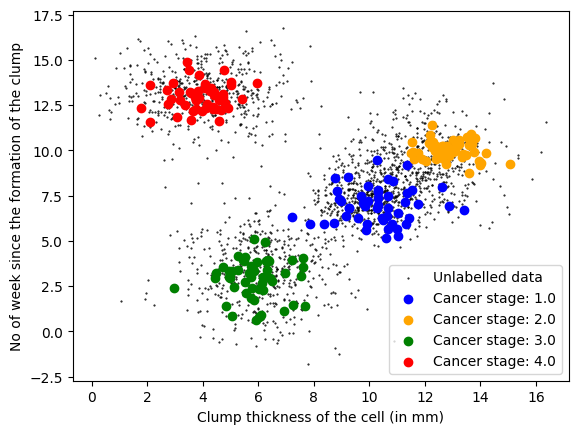

In [17]:
# plotting the other 2000 data points
plt.scatter(df['Clump thickness_new'], df['No of week_new'], marker='.', color='black', s=1, label='Unlabelled data')
plt.scatter(class1['Clump thickness'], class1['No of week'], color='blue', label='Cancer stage: 1.0')
plt.scatter(class2['Clump thickness'], class2['No of week'], color='orange', label='Cancer stage: 2.0')
plt.scatter(class3['Clump thickness'], class3['No of week'], color='green', label='Cancer stage: 3.0')
plt.scatter(class4['Clump thickness'], class4['No of week'], color='red', label='Cancer stage: 4.0')

plt.xlabel('Clump thickness of the cell (in mm)')
plt.ylabel('No of week since the formation of the clump')
plt.legend()
plt.show()

In [20]:
# concatenating the classes
labelled_classes = pd.concat([class1, class2, class3, class4])

In [26]:
len(labelled_classes)

200

In [71]:
# training a model with the labelled data using self training
X = labelled_classes[['Clump thickness', 'No of week']]
y = labelled_classes['Cancer stage']
model = SelfTrainingClassifier(KNeighborsClassifier(n_neighbors=3), verbose=True)
model.fit(X, y)

c:\Users\Alli Ajagbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_self_training.py:214: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=KNeighborsClassifier(), verbose=True)

In [79]:
# predicting the labels of the unlabelled data
unlabelled_data = df.copy()
unlabelled_data = unlabelled_data[['Clump thickness_new', 'No of week_new']]
unlabelled_data = unlabelled_data.rename(columns={'Clump thickness_new': 'Clump thickness', 'No of week_new': 'No of week'})
predicted_labels = model.predict(unlabelled_data)

In [80]:
# adding the predicted labels to the unlabelled data
unlabelled_data['Cancer stage'] = predicted_labels
len(unlabelled_data)

2000

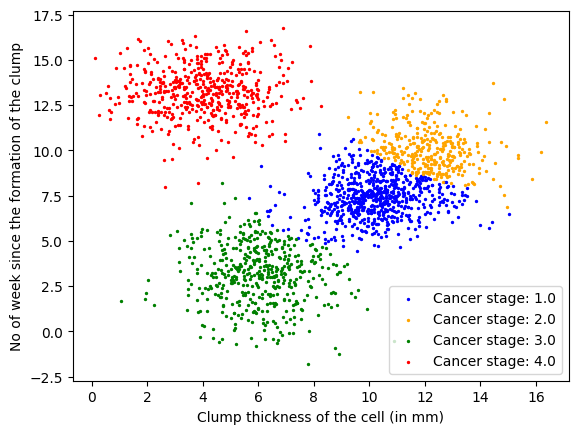

In [81]:
# plotting the labelled and unlabelled data

new_labelled_classes = unlabelled_data.copy()

class1 = new_labelled_classes[new_labelled_classes['Cancer stage'] == 1.0]
class2 = new_labelled_classes[new_labelled_classes['Cancer stage'] == 2.0]
class3 = new_labelled_classes[new_labelled_classes['Cancer stage'] == 3.0]
class4 = new_labelled_classes[new_labelled_classes['Cancer stage'] == 4.0]

plt.scatter(class1['Clump thickness'], class1['No of week'], color='blue',s=2, label='Cancer stage: 1.0')
plt.scatter(class2['Clump thickness'], class2['No of week'], color='orange',s=2, label='Cancer stage: 2.0')
plt.scatter(class3['Clump thickness'], class3['No of week'], color='green',s=2, label='Cancer stage: 3.0')
plt.scatter(class4['Clump thickness'], class4['No of week'], color='red',s=2, label='Cancer stage: 4.0')

plt.xlabel('Clump thickness of the cell (in mm)')
plt.ylabel('No of week since the formation of the clump')
plt.legend()
plt.show()

In [82]:
print(len(class1), len(class2), len(class3), len(class4))

692 335 471 502


In [83]:
y_true = df['True cancer stage']
y_pred = new_labelled_classes['Cancer stage']

print('Accuracy score: ', accuracy_score(y_true, y_pred))
print('Balanced accuracy score: ', balanced_accuracy_score(y_true, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_true, y_pred))
print('Classification report: \n', classification_report(y_true, y_pred))

Accuracy score:  0.8905
Balanced accuracy score:  0.8905000000000001
Confusion matrix: 
 [[488  12   0   0]
 [177 323   0   0]
 [ 26   0 471   3]
 [  1   0   0 499]]
Classification report: 
               precision    recall  f1-score   support

           1       0.71      0.98      0.82       500
           2       0.96      0.65      0.77       500
           3       1.00      0.94      0.97       500
           4       0.99      1.00      1.00       500

    accuracy                           0.89      2000
   macro avg       0.92      0.89      0.89      2000
weighted avg       0.92      0.89      0.89      2000



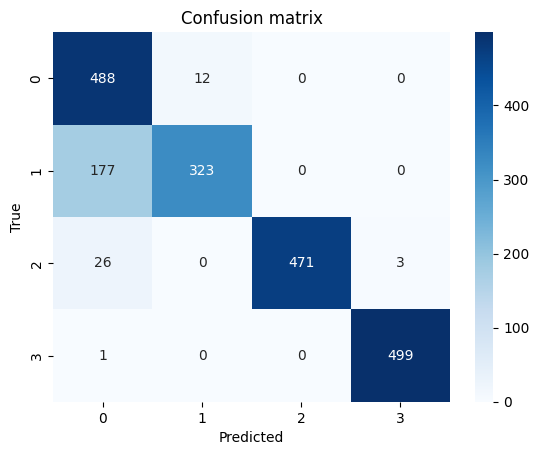

In [85]:
# plotting the confusion matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()